In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
ps = []
for n in range(5):
    ps.append(pd.read_csv('mountaincar/ppo2/progress_%d.csv' % n)['eprewmean'].values)
ppo_scores = np.array(ps)

In [60]:
ps = []
for n in range(5):
    ps.append(pd.read_csv('mountaincar/trpo/trpo_seed%d/progress.csv' % n)['EpRewMean'].values)
trpo_scores = np.array(ps)

In [141]:
ps = []
for n in range(5):
    ps.append(pd.read_csv('mountaincar/gail/trpo_gail_seed%d/progress.csv' % n)['EpRewMean'].values)
trpo_gail_scores = np.array(ps)

In [308]:
env_id = 'Humanoid'
mujoco_results = dict()
mujoco_results[env_id] = {}
mujoco_results[env_id + '_SO'] = {}
for n in [1, 5, 10, 50]:
    mujoco_results[env_id][n] = pd.read_csv('results/trpo_%s_traj_limit_%d/progress.csv' % (env_id, n))['EpTrueRewMean'].values
for n in [1, 5, 10, 50]:
    mujoco_results[env_id + '_SO'][n] = pd.read_csv('results/stateonly_%s_traj_limit_%d/progress.csv' % (env_id, n))['EpTrueRewMean'].values

In [358]:
bc_scores_humanoid = [438.1293, 398.721612, 377.77966, 386.457474]
bc_stddev_humanoid = [33.7945565, 44.18187787, 22.38236766, 21.22856011]
so_scores_humanoid = [587.603346, 521.21573, 449.74804, 387.99533]
so_stddev_humanoid = [126.727807, 141.730034, 55.4552696, 56.9129524]
gail_scores_humanoid = [587.603346, 520.483005, 369.783591, 376.233038]
gail_stddev_humanoid = [126.727807, 92.798523, 41.034220, 96.3613269]
exp_scores_humanoid = [543.768625, 608.07798, 623.555233, 610.581986]
exp_stddev_humanoid = [0, 80.6086572, 159.129040, 123.719754]
nn_scores_humanoid = [78.58, 168.42, 234.67, 336.92]
nn_stddev_humanoid = [10.83, 64.63, 54.98, 17.60]
rand_scores_humanoid = [114.97] * 4
rand_stddev_humanoid = [31.24] * 4

bc_scores_hopper = [1138.41447, 904.647000, 1460.5242645, 1283.168165]
bc_stddev_hopper = [615.4436051, 161.6312083, 535.2384926, 438.1679115]
so_scores_hopper = [3570.2447976, 3551.78815, 2775.042434, 1851.10868]
so_stddev_hopper = [5.8764107, 2.392949, 519.475515, 218.4492]
gail_scores_hopper = [3401.12134, 3536.31936, 3452.0209, 1083.67452]
gail_stddev_hopper = [10.458443, 19.54460, 15.4667, 84.50866]
exp_scores_hopper = [3564.779161, 3568.558546, 3569.696715, 3570.30434]
exp_stddev_hopper = [0.0, 2.40571, 2.35775, 2.931378]
nn_scores_hopper = [14.71, 126.73, 1597.80, 2877.68]
nn_stddev_hopper = [0.73, 3.50, 200.42, 374.68]
rand_scores_hopper = [18.04] * 4
rand_stddev_hopper = [16.61] * 4

bc_scores_halfcheetah = [726.5052714,691.1002944,668.8260414,813.7362052]
bc_stddev_halfcheetah = [319.6230633,281.2376233,221.7961735,112.9974247]
so_scores_halfcheetah = [-530.72040,-5808.36906,-5871.7696, -8340.721104]
so_stddev_halfcheetah = [241.8781,285.88862,908.46207,961.168167]
gail_scores_halfcheetah = [718.99412,730.26531,-54.48494,-4244.9080]
gail_stddev_halfcheetah = [501.92001,27.61173,841.309545,406.35074]
exp_scores_halfcheetah = [809.771583,285.8886,894.11295,896.298772]
exp_stddev_halfcheetah = [0,725.94907,424.61691,404.25068]
nn_scores_halfcheetah = [-0.88, -5.74, -2.19, -92.93]
nn_stddev_halfcheetah = [0.94, 1.28, 1.20, 23.68]
rand_scores_halfcheetah = [-287.55] * 4
rand_stddev_halfcheetah = [70.39] * 4

bc_scores_walker2d = [388.4021248,371.0952688,597.0014473,669.5640211]
bc_stddev_walker2d = [219.9704585,325.659506,271.0890984,345.8175867]
so_scores_walker2d = [3084.216967,2285.86428,2237.434821,1262.218657]
so_stddev_walker2d = [489.9757,1287.81856,1008.219609,625.890812]
gail_scores_walker2d = [3214.48949,3719.17433,2423.52066,2374.6642]
gail_stddev_walker2d = [492.582249,335.180745,887.94688,1371.44270]
exp_scores_walker2d = [3664.40531,3053.339823,3127.562987,2944.465663]
exp_stddev_walker2d = [0,874.093892,755.37299,881.568020]
nn_scores_walker2d = [65.80, 270.55, 283.34, 1974.30]
nn_stddev_walker2d = [11.69, 5.94, 83.24, 1267.29]
rand_scores_walker2d = [0.90] * 4
rand_stddev_walker2d = [5.90] * 4

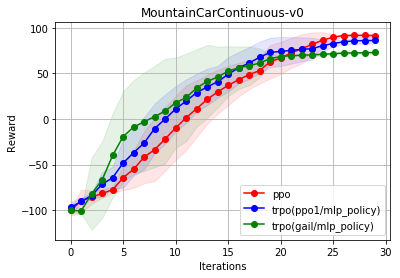

In [149]:
plt.figure()
plt.title("MountainCarContinuous-v0")
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.grid()

limit = 30
ppo_scores_mean = np.mean(ppo_scores[:,:limit], axis=0)
ppo_scores_std = np.std(ppo_scores[:,:limit], axis=0)
ppo_sizes = range(limit)

plt.fill_between(ppo_sizes, ppo_scores_mean - ppo_scores_std,
                 ppo_scores_mean + ppo_scores_std, alpha=0.1,
                 color="r")
plt.plot(ppo_sizes, ppo_scores_mean, 'o-', color="r",
         label="ppo")


trpo_scores_mean = np.mean(trpo_scores[:,:limit], axis=0)
trpo_scores_std = np.std(trpo_scores[:,:limit], axis=0)
trpo_sizes = range(limit)

plt.fill_between(trpo_sizes, trpo_scores_mean - trpo_scores_std,
                 trpo_scores_mean + trpo_scores_std, alpha=0.1,
                 color="b")
plt.plot(trpo_sizes, trpo_scores_mean, 'o-', color="b",
         label="trpo(ppo1/mlp_policy)")

trpo_gail_scores_mean = np.mean(trpo_gail_scores[:,:limit], axis=0)
trpo_gail_scores_std = np.std(trpo_gail_scores[:,:limit], axis=0)
trpo_gail_sizes = range(limit)

plt.fill_between(trpo_gail_sizes, trpo_gail_scores_mean - trpo_gail_scores_std,
                 trpo_gail_scores_mean + trpo_gail_scores_std, alpha=0.1,
                 color="g")
plt.plot(trpo_gail_sizes, trpo_gail_scores_mean, 'o-', color="g",
         label="trpo(gail/mlp_policy)")

plt.legend(loc="lower right")

In [237]:
gail_scores

[array([  21.86020142,   45.89935677,   82.75620862, ..., 2464.35606536,
        2457.06982428, 2491.0006581 ]),
 array([  21.86020142,   46.46221664,   83.90565842, ..., 2859.68172366,
        2913.22733685, 2977.62441413]),
 array([ 21.86020142,  42.0444959 ,  77.14272717, ..., 963.00456271,
        946.84802924, 947.63382983]),
 array([  21.86020142,   46.39953898,   81.83137379, ..., 3156.6060291 ,
        3100.40334793, 3097.1752988 ])]

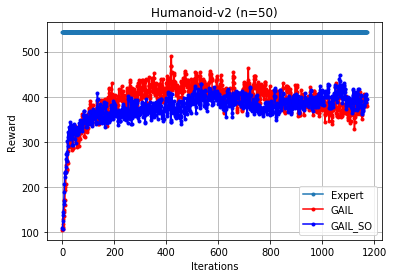

In [317]:
n_traj = 50
plt.figure()
plt.title("%s-v2 (n=%d)" % (env_id, n_traj))
# plt.title("%s-v2 (All)" % (env_id))
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.grid()

limit = 1171
plt.plot(range(limit), [543] * limit, '.-', label="Expert")
# plt.plot(range(limit), [2699.11] * limit, '.-', label="NaiveNN")
# plt.plot(range(limit), [0.90] * limit, '.-', label="Random")


gail_scores = np.array([sc[:limit] for k, sc in mujoco_results[env_id].items() if k == n_traj or n_traj == 0])
gail_scores_mean = np.mean(gail_scores[:][:limit], axis=0)
gail_scores_std = np.std(gail_scores[:][:limit], axis=0)
gail_sizes = range(limit)

plt.fill_between(gail_sizes, gail_scores_mean - gail_scores_std,
                 gail_scores_mean + gail_scores_std, alpha=0.1,
                 color="r")
plt.plot(gail_sizes, gail_scores_mean, '.-', color="r",
         label="GAIL")

gail_scores = np.array([sc[:limit] for k, sc in mujoco_results[env_id + '_SO'].items() if k == n_traj or n_traj == 0])
gail_scores_mean = np.mean(gail_scores[:][:limit], axis=0)
gail_scores_std = np.std(gail_scores[:][:limit], axis=0)
gail_sizes = range(limit)

plt.fill_between(gail_sizes, gail_scores_mean - gail_scores_std,
                 gail_scores_mean + gail_scores_std, alpha=0.1,
                 color="b")
plt.plot(gail_sizes, gail_scores_mean, '.-', color="b",
         label="GAIL_SO")
    
# for n in [1]:#, 5, 10, 50]:
#     dat = mujoco_results['Hopper_SO'][n][:limit]
#     plt.plot(range(limit), dat, '-', 
#          label="SO_n_traj=%d"%n)
# plt.plot(range(len(mujoco_results['Hopper'][0])), mujoco_results['Hopper'][0], '-', label="Shitty")    


plt.legend(loc="lower right")

C:\Users\Veniversum\Anaconda2\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Veniversum\Anaconda2\envs\python3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


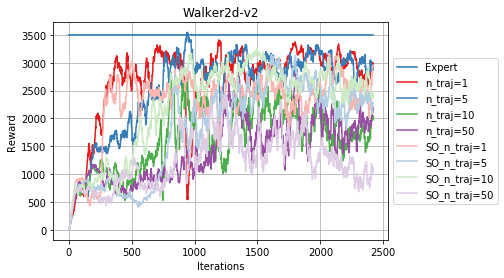

In [306]:
plt.figure()
plt.title("%s-v2" % (env_id))
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.grid()
ax = plt.axes()
limit = 2419
plt.plot(range(limit), [3500] * limit, '-', label="Expert")    

ax.set_color_cycle([plt.cm.Set1(i) for i in np.linspace(0, 1, 10)])
for n in [1, 5, 10, 50]:
    dat = mujoco_results[env_id][n][:limit]
    plt.plot(range(limit), dat, '-', label="n_traj=%d"%n)

ax.set_color_cycle([plt.cm.Pastel1(i) for i in np.linspace(0, 1, 10)])
for n in [1, 5, 10, 50]:
    dat = mujoco_results[env_id + '_SO'][n][:limit]
    plt.plot(range(limit), dat, '-', label="SO_n_traj=%d"%n)
# plt.plot(range(len(mujoco_results['Hopper'][0])), mujoco_results['Hopper'][0], '-', label="Shitty")    


# plt.legend(loc="lower right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

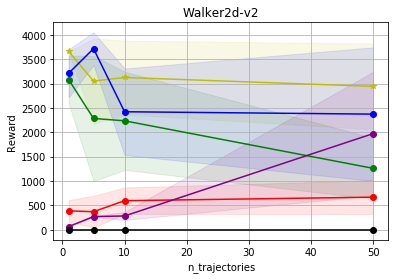

In [363]:
plt.figure()
plt.title("Walker2d-v2")
plt.xlabel("n_trajectories")
plt.ylabel("Reward")
plt.grid()

n_traj = [1, 5, 10, 50]
bc_scores = np.array(bc_scores_walker2d)
bc_stddev = np.array(bc_stddev_walker2d)
so_scores = np.array(so_scores_walker2d)
so_stddev = np.array(so_stddev_walker2d)
gail_scores = np.array(gail_scores_walker2d)
gail_stddev = np.array(gail_stddev_walker2d)
exp_scores = np.array(exp_scores_walker2d)
exp_stddev = np.array(exp_stddev_walker2d)
rand_scores = np.array(rand_scores_walker2d)
rand_stddev = np.array(rand_stddev_walker2d)
nn_scores = np.array(nn_scores_walker2d)
nn_stddev = np.array(nn_stddev_walker2d)
plt.fill_between(n_traj, exp_scores - exp_stddev,
                 exp_scores + exp_stddev, alpha=0.1,
                 color="y")
plt.plot(n_traj, exp_scores, '*-', color="y",
         label="EXP")
plt.fill_between(n_traj, bc_scores - bc_stddev,
                 bc_scores + bc_stddev, alpha=0.1,
                 color="r")
plt.plot(n_traj, bc_scores, 'o-', color="r",
         label="BC")
plt.fill_between(n_traj, so_scores - so_stddev,
                 so_scores + so_stddev, alpha=0.1,
                 color="g")
plt.plot(n_traj, so_scores, 'o-', color="g",
         label="SO")
plt.fill_between(n_traj, gail_scores - gail_stddev,
                 gail_scores + gail_stddev, alpha=0.1,
                 color="b")
plt.plot(n_traj, gail_scores, 'o-', color="b",
         label="GAIL")
plt.fill_between(n_traj, nn_scores - nn_stddev,
                 nn_scores + nn_stddev, alpha=0.1,
                 color="purple")
plt.plot(n_traj, nn_scores, 'o-', color="purple",
         label="NN")
plt.fill_between(n_traj, rand_scores - rand_stddev,
                 rand_scores + rand_stddev, alpha=0.1,
                 color="black")
plt.plot(n_traj, rand_scores, 'o-', color="black",
         label="RAND")

# plt.legend(loc="lower left", bbox_to_anchor=(1, 0))

In [349]:
traj_data = np.load('C:/Users/Veniversum/Downloads/stochastic.trpo.Walker2d.0.00.npz')

In [124]:
dset = Mujoco_Dset('C:/Users/Veniversum/Downloads/expert_model.MountainCarContinuous-v0 (1).npz')

In [130]:
%matplotlib inline
dset.plot()

In [354]:
np.max(traj_data['ep_rets'])

3898.4689282152335

In [200]:
acs = traj_data['acs']
# acs = np.array(flatten(acs))
obs = traj_data['obs']
# obs = np.array(flatten(obs))

In [205]:
obs[8].shape

(70, 2)

In [193]:
len(acs[0].shape)

1

In [122]:
np.squeeze(acs).shape

(988291, 3)

In [108]:
np.squeeze(acs)[1, 0]

IndexError: too many indices for array

In [91]:
def flatten(x):
            # x.shape = (E,), or (E, L, D)
            _, size = x[0].shape
            episode_length = [len(i) for i in x]
            y = np.zeros((sum(episode_length), size))
            start_idx = 0
            for l, x_i in zip(episode_length, x):
                y[start_idx:(start_idx+l)] = x_i
                start_idx += l
                return y

In [133]:
import h5py

C:\Users\Veniversum\Anaconda2\envs\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [134]:
hf = h5py.File('C:/Users/Veniversum/Downloads/MountainCar-v0.h5')

In [194]:
aaa = np.array([1,2,3])

In [197]:
aaa[:,None].shape

(3, 1)